In [1]:
import tensorflow as tf

# Introduction to neural network classification with TensorFlow

A classification is where you try to classify something as one thing or another.
* Binary Classification
* Multiclass Classification
* Multilabl Classfication

### Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples =1000

#Create circles
X,y = make_circles(n_samples,noise=0.03,random_state =42)

In [3]:
#Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#Check out labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Visualizing it

In [5]:
import pandas as pd
circles =pd.DataFrame({'X0':X[:,0], 'X1': X[:, 1], 'label':y})
circles #Filling the X,y in it

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


### Visualize with a plot

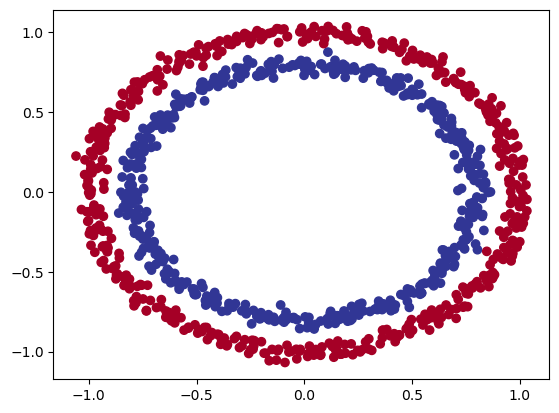

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:, 1],c=y,cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
len(X),len(y)

(1000, 1000)

# Steps in Modelling

1. Get data ready (turn into tensors)
2. Build or pick a pretrained model
3. Fit the model to the data and make a prediction
4. Evaluate the model

In [9]:
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X,y,epochs =5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 6.3728 - accuracy: 0.4970
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 6.1728 - accuracy: 0.4830
Epoch 3/5
32/32 [==============================] - 0s 928us/step - loss: 6.1080 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 5.9900 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 5.5728 - accuracy: 0.4950


In [10]:
#Steps to improve it
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

#Here we did it wrong
'''
We should fit on training data and evaluate on testing data
'''

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


'\nWe should fit on training data and evaluate on testing data\n'

Since we are working with binary classification problem and our model is
getting around ~50% accuracy..its performing as if it is guessing.

So lets step things up a notch and add an extra layer

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 =tf.keras.Sequential([tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(1)
                             ])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X,y)

'''
We did it wrong
We should fit on training data and evaluate on testing data
'''

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


'\nWe did it wrong\nWe should fit on training data and evaluate on testing data\n'

## To improve our classification model

1. Add layers
2. Increase hidden units
3. Change activation function (relu,softmax)
4. Change optimization function (Adam,SGD)
5. Change learning rate
6. Fitting more data
7. Fitting for longer (more epochs)

In [14]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), #100 Hidden units
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
#3. Fit the model
model_3.fit(X,y, epochs=100,verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.5080


[0.7011057138442993, 0.5080000162124634]

## Still giving 50% accuracy

In [17]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.4824965 ],
       [0.57645017],
       [0.5816934 ],
       [0.58906406],
       [0.4268417 ],
       [0.59359854],
       [0.5715493 ],
       [0.4757106 ],
       [0.4739901 ],
       [0.5933603 ],
       [0.5219093 ],
       [0.53603435],
       [0.5802814 ],
       [0.4457054 ],
       [0.43730184],
       [0.4523959 ],
       [0.55480087],
       [0.45585614],
       [0.5633681 ],
       [0.5082972 ],
       [0.50562143],
       [0.6109979 ],
       [0.4505722 ],
       [0.48661256],
       [0.60701454],
       [0.5914485 ],
       [0.56372845],
       [0.45178774],
       [0.44773257],
       [0.44180432],
       [0.47608358],
       [0.5981699 ],
       [0.56876487],
       [0.4512377 ],
       [0.45023015],
       [0.61462426],
       [0.59227526],
       [0.53520113],
       [0.4488797 ],
       [0.5107551 ],
       [0.5034103 ],
       [0.555918  ],
       [0.51750267],
       [0.44537145],
       [0.5319607 ],
       [0.5526228 ],
       [0.435605  ],
       [0.554

To visualize our model's predictions lets create a function
'plot_decision_boundary() ',

This function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions

In [26]:
import numpy as np

def plot_decision_boundary(model,X,y):
    """
    Plot the decision boundary created by a model predicting on X.
    """
    #Define the axis boundaries of the plot and create a meshgrid
    x_min,x_max = X[:, 0].min() -0.1, X[:,0].max() +0.1
    y_min,y_max = X[:,1].min() -0.1, X[:,1].max() +0.1
    
    #Creating meshgrid
    xx,yy =np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))
                        
    #Create X values(we are going to make predictions on it)
    x_in = np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together
    
                        
    #Make predictions
    y_pred = model.predict(x_in)
                        
    #Check for multi-class
    if len(y_pred[0])>1:
        print("doing multiclass classification")
        #We have to reshape our predictions to get them ready for plot
        y_pred =np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred =np.round(y_pred).reshape(xx.shape)
                        
        #Plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,alpha=0.7)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
                        

In [18]:
x_min,x_max =X[:, 0].min() -0.1, X[:,0].max() +0.1
y_min,y_max = X[:,1].min() -0.1, X[:,1].max() +0.1

x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

313/313 [==============================] - 0s 825us/step
doing binary classification


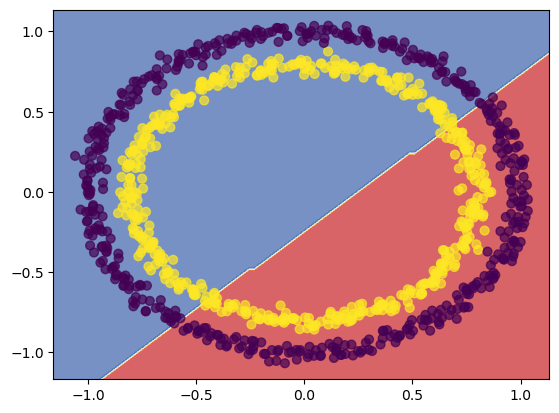

In [27]:
#Checking out the fucntion
plot_decision_boundary(model=model_3,X=X,y=y)

## This function is inspired by:-http://cs231n.stanford.edu/

# As decision boundary is a straight line we use regression to solve it

In [30]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)
     

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 349.3314 - mae: 349.3314
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 235.4536 - mae: 235.4536
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 124.6394 - mae: 124.6394
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 48.1299 - mae: 48.1299
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 78.2840 - mae: 78.2840
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 70.3911 - mae: 70.3911
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 44.1750 - mae: 44.1750
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 51.4404 - mae: 51.4404
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 42.5520 - mae: 42.5520
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 45.6558 - mae: 45.6558
Epoch 11/100
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 38.5502 - mae: 38.5502
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 38.8989 - mae: 38.8989
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 38.4609 - mae: 38.4609
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3758 - mae: 38.3758
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 38.5303 - mae: 38.5303
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 38.4474 - mae: 38.4474
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 38.9451 - mae: 38.9451
Epoch 94/100
5/5 [==============================] - 0s 1ms/step - loss: 38.0860 - mae: 38.0860
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3149 - mae: 38.3149
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 38.5115 - mae: 38.5115
Epoch 97/100
5/5 [==============================] - 0s 2ms/step

In [31]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)
     

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 354.6351 - mae: 354.6351
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 219.4747 - mae: 219.4747
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 91.2552 - mae: 91.2552
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 64.3294 - mae: 64.3294
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 83.9418 - mae: 83.9418
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 57.6724 - mae: 57.6724
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 44.8694 - mae: 44.8694
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 44.8448 - mae: 44.8448
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6958 - mae: 43.6958
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.9584 - mae: 42.9584
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 2ms/step - loss: 38.4651 - mae: 38.4651
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 38.5575 - mae: 38.5575
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3470 - mae: 38.3470
Epoch 90/100
5/5 [==============================] - 0s 1ms/step - loss: 38.2409 - mae: 38.2409
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 38.0486 - mae: 38.0486
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 38.5481 - mae: 38.5481
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 38.9369 - mae: 38.9369
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3132 - mae: 38.3132
Epoch 95/100
5/5 [==============================] - 0s 1ms/step - loss: 38.0391 - mae: 38.0391
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 38.4489 - mae: 38.4489
Epoch 97/100
5/5 [==============================] - 0s 1ms/step

2/2 [==============================] - 0s 2ms/step


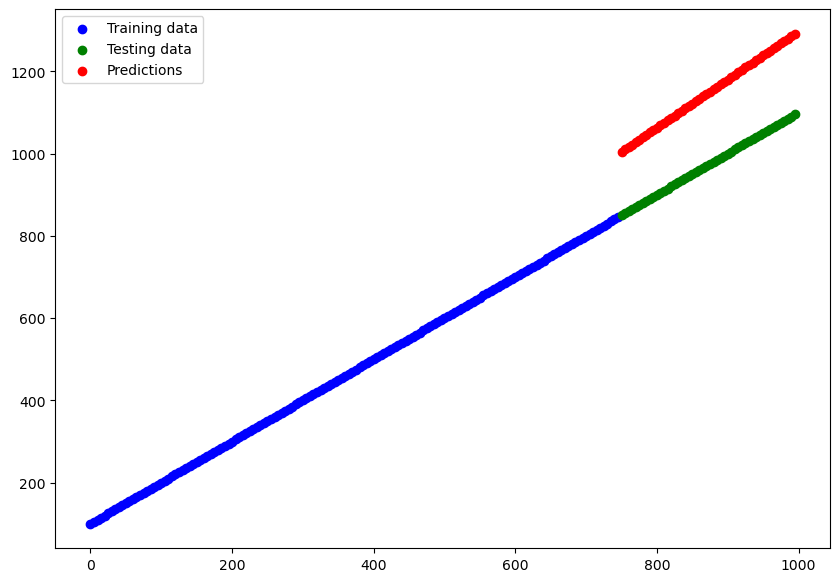

In [32]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

<h1><font color='red'>NON LINEARITY</h1></font>

In [33]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
tf.keras.layers.Dense(1,activation =tf.keras.activations.linear)
])
# 2. Compile the model
model_4.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy']) #lr is learning rate

# 3. Fit the model
history =model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7946 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7798 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7677 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7656 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7548 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7622 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7553 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7747 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7752 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7746 - accuracy: 0.4860
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 4.4906 - accuracy: 0.4730
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4900 - accuracy: 0.4730
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4894 - accuracy: 0.4730
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4888 - accuracy: 0.4730
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4881 - accuracy: 0.4730
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4875 - accuracy: 0.4730
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4869 - accuracy: 0.4730
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4862 - accuracy: 0.4730
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4856 - accuracy: 0.4720
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4849 - accuracy: 0.4720
Epoch 93/100


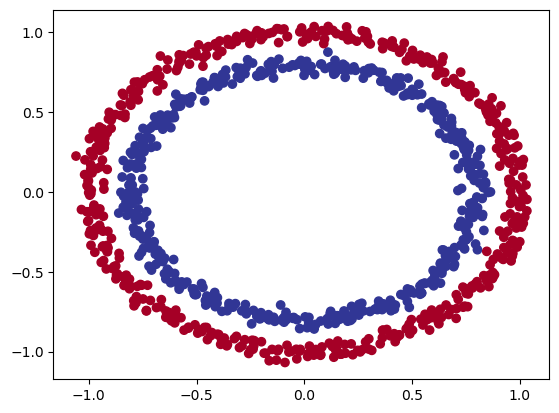

In [34]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 759us/step
doing binary classification


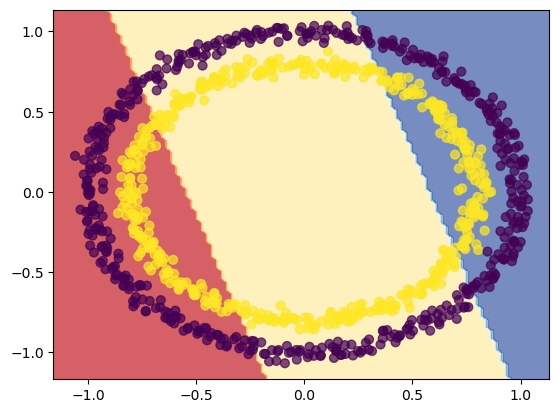

In [38]:
#Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                      X=X,y=y)

#Red is X class
#Blue is Y class
#Yellow is a crossover

Building our first neural network with a non-linear activation function

In [41]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])
# 3. Fit the model
history =model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3362 - accuracy: 0.4730
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2770 - accuracy: 0.4710
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2497 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2082 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1463 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1350 - accuracy: 0.4690
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1221 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 1000us/step - loss: 4.1182 - accuracy: 0.4680
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1054 - accuracy: 0.4670
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0705 - accuracy: 0.4680
Epoch 

32/32 [==============================] - 0s 949us/step - loss: 0.9002 - accuracy: 0.4820
Epoch 83/100
32/32 [==============================] - 0s 969us/step - loss: 0.8943 - accuracy: 0.4830
Epoch 84/100
32/32 [==============================] - 0s 959us/step - loss: 0.8888 - accuracy: 0.4830
Epoch 85/100
32/32 [==============================] - 0s 957us/step - loss: 0.8836 - accuracy: 0.4840
Epoch 86/100
32/32 [==============================] - 0s 896us/step - loss: 0.8789 - accuracy: 0.4830
Epoch 87/100
32/32 [==============================] - 0s 946us/step - loss: 0.8744 - accuracy: 0.4850
Epoch 88/100
32/32 [==============================] - 0s 909us/step - loss: 0.8702 - accuracy: 0.4850
Epoch 89/100
32/32 [==============================] - 0s 957us/step - loss: 0.8662 - accuracy: 0.4860
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8624 - accuracy: 0.4870
Epoch 91/100
32/32 [==============================] - 0s 949us/step - loss: 0.8586 - accuracy: 0.

<h1><font color =red>FUCKING FINALLY</h1></font>

# Our classification model is showing more than 50% accuracy

In [45]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid') #This is key!!!
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])
# 3. Fit the model
history =model_7.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.6962 - accuracy: 0.5040
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4990
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4980
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.4860
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.4990
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.4700
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5050
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5070
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5650
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5160
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8880
Epoch 84/200
32/32 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.9130
Epoch 85/200
32/32 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.9050
Epoch 86/200
32/32 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.9140
Epoch 87/200
32/32 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.9170
Epoch 88/200
32/32 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.9190
Epoch 89/200
32/32 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.9210
Epoch 90/200
32/32 [==============================] - 0s 1ms/step - loss: 0.3874 - accuracy: 0.9200
Epoch 91/200
32/32 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.9340
Epoch 92/200
32/32 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.9370
Epoch 93/200


32/32 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9810
Epoch 165/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1158 - accuracy: 0.9770
Epoch 166/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9790
Epoch 167/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9800
Epoch 168/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9770
Epoch 169/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9760
Epoch 170/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.9760
Epoch 171/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.9800
Epoch 172/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9800
Epoch 173/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.9800
Epoc

In [46]:
# 4. Evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9780


[0.088079072535038, 0.9779999852180481]

313/313 [==============================] - 0s 763us/step
doing binary classification


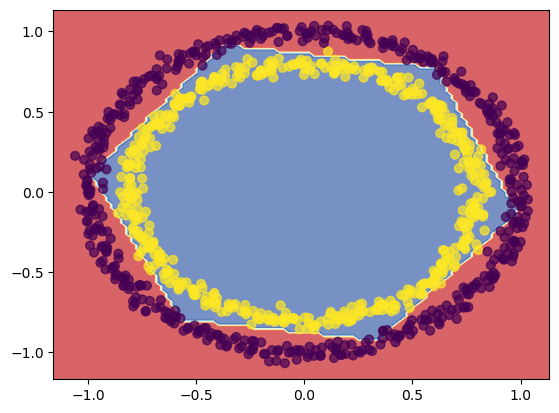

In [47]:
#Lets visualize our metrics
plot_decision_boundary(model_7,X,y)

<h1><font color ='green'>THIS IS PERFECTION</font></h1>

The combination of **linear (straight lines ) and non-linear (non-straight lines)
functions** is one of the key fundamentals of neural networks.

## Building a non-linear function from scratch

In [50]:
#Create a tensor
A =tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

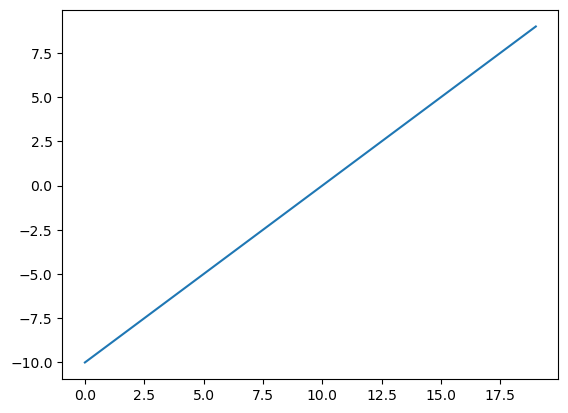

In [51]:
#Plot the tensor
plt.plot(A);

In [52]:
#lets start by replicating sigmoid - sigmoid(x) =1/(1+ e^(-x))
def sigmoid(x):
    return 1/(1 +tf.exp(-x))

#Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

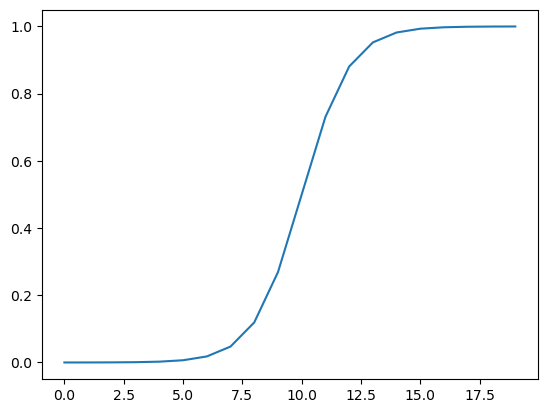

In [53]:
#Ploting them
plt.plot(sigmoid(A));